In [273]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [308]:
ads_data = pd.read_csv ("C:/Users/yana2/Рабочий стол/ads_data.csv",  sep=';')

In [309]:
ads_data.drop(columns=['Unnamed: 0'],inplace = True)


In [310]:
ads_data

,ad_id,time,event,date,ad_cost_type,has_video,client_union_id,campaign_union_id,platform,ad_cost,target_audience_count,user_id,Unnamed: 13,ad_cost_type.nunique
0,23456,1554076848,view,05.04.2019,CPM,0,5681,23456,android,190.00,125560,793,NaN,NaN
1,111941,1554135866,view,05.04.2019,CPM,0,111793,111941,ios,215.20,32277,1041,NaN,NaN
2,111941,1554135866,view,03.04.2019,CPM,0,111793,111941,ios,215.20,32277,41,NaN,NaN
3,42987,1554135866,view,02.04.2019,CPM,0,28541,42985,ios,199.10,80160,898,NaN,NaN
4,23456,1554135866,view,01.04.2019,CPM,0,5681,23456,web,190.00,125560,29,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,5307467,1554135824,view,06.04.2019,CPM,0,722,42985,web,196.24,80160,673,NaN,NaN
97,12546127,1553545686,view,02.04.2019,CPM,0,111818,23456,android,215.21,125560,680,NaN,NaN
98,6623587,1553486668,view,03.04.2019,CPM,0,722,23456,ios,199.20,53185,687,NaN,NaN
99,7281647,1554076848,view,02.04.2019,CPM,0,110374,111941,web,190.19,125560,694,NaN,NaN


In [311]:
ads_data [ 'full_date'] = pd.to_datetime(ads_data.time, unit='s')

In [312]:
ads_data [ 'date'] = pd.to_datetime(ads_data.date)

In [279]:
ads_data

,ad_id,time,event,date,ad_cost_type,has_video,client_union_id,campaign_union_id,platform,ad_cost,target_audience_count,user_id,full_date
0,23456,1554076848,view,2019-05-04,CPM,0,5681,23456,android,190.00,125560,793,2019-04-01 00:00:48
1,111941,1554135866,view,2019-05-04,CPM,0,111793,111941,ios,215.20,32277,1041,2019-04-01 16:24:26
2,111941,1554135866,view,2019-03-04,CPM,0,111793,111941,ios,215.20,32277,41,2019-04-01 16:24:26
3,42987,1554135866,view,2019-02-04,CPM,0,28541,42985,ios,199.10,80160,898,2019-04-01 16:24:26
4,23456,1554135866,view,2019-01-04,CPM,0,5681,23456,web,190.00,125560,29,2019-04-01 16:24:26
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,5307467,1554135824,view,2019-06-04,CPM,0,722,42985,web,196.24,80160,673,2019-04-01 16:23:44
97,12546127,1553545686,view,2019-02-04,CPM,0,111818,23456,android,215.21,125560,680,2019-03-25 20:28:06
98,6623587,1553486668,view,2019-03-04,CPM,0,722,23456,ios,199.20,53185,687,2019-03-25 04:04:28
99,7281647,1554076848,view,2019-02-04,CPM,0,110374,111941,web,190.19,125560,694,2019-04-01 00:00:48


In [280]:
#Получить статистику по дням

<AxesSubplot:xlabel='date'>

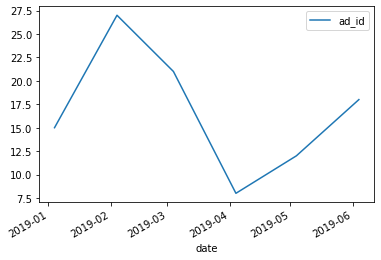

In [281]:
ads_data.groupby('date') \
    .agg({'ad_id':'count'}).plot()

In [282]:
ads_data.groupby(['date','event'],as_index=False) \
        .agg({'ad_id':'count'}) \
        .pivot(index='date',columns='event', values='ad_id').reset_index()

event,date,click,view
0,2019-01-04,8,7
1,2019-02-04,13,14
2,2019-03-04,9,12
3,2019-04-04,3,5
4,2019-05-04,5,7
5,2019-06-04,9,9


In [283]:
#справка
??pd.pivot

In [284]:
#число уникальных объявлений и компаний по дням campaign_union_id

In [285]:
ads_data.groupby(['date'],as_index=False) \
        .agg({'ad_id':'nunique', 'campaign_union_id':'nunique'}) 

,date,ad_id,campaign_union_id
0,2019-01-04,13,3
1,2019-02-04,17,3
2,2019-03-04,18,3
3,2019-04-04,8,3
4,2019-05-04,10,3
5,2019-06-04,12,3


In [286]:
#разобраться почему произошел скачок 2019-02-04? 
Каких событий стало больше? у всех объявлений или только у некоторых?

Object `некоторых` not found.


In [287]:
ads_data[ads_data.date=='2019-02-04'] \
    .groupby('ad_id') \
    .agg({'campaign_union_id':'count'}) \
    .sort_values('campaign_union_id',ascending=False) \
    .head()

,campaign_union_id
ad_id,
12546127,5
1182610,3
42987,2
615073,2
8597767,2


In [288]:
ad_id = 12546127

In [289]:
ads_data.query('ad_id==@ad_id') \
    .groupby ('date') \
    .agg ({'campaign_union_id':'count'})

,campaign_union_id
date,
2019-02-04,5
2019-05-04,1


In [290]:
ads_data.query('ad_id==@ad_id').head()

,ad_id,time,event,date,ad_cost_type,has_video,client_union_id,campaign_union_id,platform,ad_cost,target_audience_count,user_id,full_date
46,12546127,1553840776,click,2019-02-04,CPM,0,111818,42985,web,196.14,80160,2328,2019-03-29 06:26:16
53,12546127,1554430956,view,2019-02-04,CPM,0,111818,42985,ios,199.11,15277,3329,2019-04-05 02:22:36
74,12546127,1554135794,click,2019-05-04,CPM,0,111818,42985,web,190.14,80160,519,2019-04-01 16:23:14
91,12546127,1554135854,view,2019-02-04,CPM,0,223274,42985,web,196.23,124560,638,2019-04-01 16:24:14
97,12546127,1553545686,view,2019-02-04,CPM,0,111818,23456,android,215.21,125560,680,2019-03-25 20:28:06


In [291]:
#каких событий стало больше? у всех объявлений или только у некоторых?

In [292]:
ads_data.groupby('date') \
    .agg({'ad_id':'count'})

,ad_id
date,
2019-01-04,15
2019-02-04,27
2019-03-04,21
2019-04-04,8
2019-05-04,12
2019-06-04,18


In [316]:
#ивенты по дням
event = ads_data.groupby(['date','event'],as_index=False) \
        .agg({'ad_id':'count'}) \
        .pivot(index='date',columns='event', values='ad_id').reset_index() 

event['sum'] = event['click']+ event['view']
event

event,date,click,view,sum
0,2019-01-04,8,7,15
1,2019-02-04,13,14,27
2,2019-03-04,9,12,21
3,2019-04-04,3,5,8
4,2019-05-04,5,7,12
5,2019-06-04,9,9,18


In [294]:
#ивенты по дням и компаниям
event1 = ads_data.groupby(['date', 'ad_id', 'event'],as_index=False) \
        .agg({'time':'count'}) \
        .pivot(index=['date','ad_id'],columns='event', values='time').reset_index()
event1

event,date,ad_id,click,view
0,2019-01-04,23456,NaN,1.0
1,2019-01-04,58963,1.0,NaN
2,2019-01-04,111941,1.0,NaN
3,2019-01-04,380005,NaN,1.0
4,2019-01-04,861568,1.0,NaN
...,...,...,...,...
73,2019-06-04,5307467,NaN,1.0
74,2019-06-04,6623587,1.0,NaN
75,2019-06-04,7281647,1.0,1.0
76,2019-06-04,10571947,NaN,1.0


In [317]:
#ad_cost_type
event3 = ads_data.groupby(['date','ad_cost_type'],as_index=False) \
        .agg({'ad_id':'count'}) \
        .pivot(index='date',columns='ad_cost_type', values='ad_id').reset_index()

event3['sum'] = event3['CPC']+ event3['CPM']
event3

ad_cost_type,date,CPC,CPM,sum
0,2019-01-04,6,9,15
1,2019-02-04,7,20,27
2,2019-03-04,4,17,21
3,2019-04-04,2,6,8
4,2019-05-04,4,8,12
5,2019-06-04,6,12,18


In [313]:
#ad_cost_type
event2 = ads_data.groupby(['date', 'ad_id', 'ad_cost_type'],as_index=False) \
        .agg({'time':'count'}) \
        .pivot(index=['date','ad_id'],columns='ad_cost_type', values='time').reset_index()
event2

ad_cost_type,date,ad_id,CPC,CPM
0,2019-01-04,23456,NaN,1.0
1,2019-01-04,58963,1.0,NaN
2,2019-01-04,111941,1.0,NaN
3,2019-01-04,380005,1.0,NaN
4,2019-01-04,861568,1.0,NaN
...,...,...,...,...
73,2019-06-04,5307467,NaN,1.0
74,2019-06-04,6623587,NaN,1.0
75,2019-06-04,7281647,NaN,2.0
76,2019-06-04,10571947,1.0,NaN


In [325]:
event4 = ads_data.query ('has_video ==1') \
                .groupby(['date','ad_id'],as_index=False) \
                .agg({'has_video':'count'}) 
event4

,date,ad_id,has_video
0,2019-02-04,701047,1
1,2019-02-04,1503652,1
2,2019-02-04,12546127,1
3,2019-03-04,701047,1
4,2019-06-04,701047,4
